# MNIST OCR Neural Network with Varying Training Set Sizes

This notebook:
1. Loads the provided **JCB704_MNIST_resized.csv** dataset.
2. For each selected fraction of the original data (5%, 10%, 20%, 40%, 80%):
   - Takes a balanced subsample of that fraction.
   - Performs a train/test split.
   - Trains a neural network (MLP) with:
     - Two hidden layers of **128** and **64** nodes
     - **ReLU** activation in the hidden layers
     - **Sigmoid (logistic)** output layer (via `predict_proba` for the positive class)
     - **Adam** optimizer
     - **max_iter = 500**
   - Computes **precision**, **recall**, and **ROC AUC**.
3. Compares performance across fractions.


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix


In [2]:
!pwd


/tf/ml-ecornell/Cornell-AI360/JCB704


In [3]:
# Update the path if your CSV is in a different location
data_path = "JCB704_MNIST_resized.csv"

df = pd.read_csv(data_path)
print("Full dataset shape:", df.shape)
print("Label distribution:")
print(df['labels'].value_counts())


Full dataset shape: (10842, 197)
Label distribution:
labels
1    5421
0    5421
Name: count, dtype: int64


In [6]:
def evaluate_fraction(df, fraction, test_size=0.2, random_state=42):
    """Subsample a balanced fraction of the full dataset, then
    train/test split and fit an MLP classifier.

    Returns a dict with performance metrics.
    """
    assert 0 < fraction <= 1.0, "fraction must be between 0 and 1."

    # Balanced subsample by label (keeps class distribution the same across labels)
    df_balanced = (
        df
        .groupby('labels', group_keys=False)
        .apply(lambda g: g.sample(frac=fraction, random_state=random_state))
    )

    X = df_balanced.drop(columns=['labels']).values
    y = df_balanced['labels'].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    clf = MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation='relu',      # ReLU in hidden layers
        solver='adam',          # Adam optimizer
        max_iter=500,
        random_state=random_state
    )

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    # For binary classification, the second column is the probability of the positive class (label 1)
    y_proba = clf.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    print(f"=== Fraction: {fraction*100:.0f}% of original data ===")
    print(f"Subset size: {len(df_balanced)} (train: {len(X_train)}, test: {len(X_test)})")
    print("Confusion matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification report:")
    print(classification_report(y_test, y_pred, digits=4))

    return {
        "fraction": fraction,
        "subset_size": len(df_balanced),
        "precision": precision,
        "recall": recall,
        "roc_auc": auc
    }


In [7]:
fractions = [0.05, 0.10, 0.20, 0.40, 0.80]

results = []
for frac in fractions:
    metrics = evaluate_fraction(df, frac)
    results.append(metrics)

results_df = pd.DataFrame(results)
results_df['fraction_pct'] = results_df['fraction'] * 100
results_df = results_df[['fraction_pct', 'subset_size', 'precision', 'recall', 'roc_auc']]
results_df


/tmp/ipykernel_11698/3784566842.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=fraction, random_state=random_state))


=== Fraction: 5% of original data ===
Subset size: 542 (train: 433, test: 109)
Confusion matrix:
[[48  7]
 [ 3 51]]

Classification report:
              precision    recall  f1-score   support

           0     0.9412    0.8727    0.9057        55
           1     0.8793    0.9444    0.9107        54

    accuracy                         0.9083       109
   macro avg     0.9102    0.9086    0.9082       109
weighted avg     0.9105    0.9083    0.9082       109



/tmp/ipykernel_11698/3784566842.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=fraction, random_state=random_state))


=== Fraction: 10% of original data ===
Subset size: 1084 (train: 867, test: 217)
Confusion matrix:
[[106   3]
 [  7 101]]

Classification report:
              precision    recall  f1-score   support

           0     0.9381    0.9725    0.9550       109
           1     0.9712    0.9352    0.9528       108

    accuracy                         0.9539       217
   macro avg     0.9546    0.9538    0.9539       217
weighted avg     0.9545    0.9539    0.9539       217



/tmp/ipykernel_11698/3784566842.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=fraction, random_state=random_state))


=== Fraction: 20% of original data ===
Subset size: 2168 (train: 1734, test: 434)
Confusion matrix:
[[212   5]
 [  6 211]]

Classification report:
              precision    recall  f1-score   support

           0     0.9725    0.9770    0.9747       217
           1     0.9769    0.9724    0.9746       217

    accuracy                         0.9747       434
   macro avg     0.9747    0.9747    0.9747       434
weighted avg     0.9747    0.9747    0.9747       434



/tmp/ipykernel_11698/3784566842.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=fraction, random_state=random_state))


=== Fraction: 40% of original data ===
Subset size: 4336 (train: 3468, test: 868)
Confusion matrix:
[[422  12]
 [  6 428]]

Classification report:
              precision    recall  f1-score   support

           0     0.9860    0.9724    0.9791       434
           1     0.9727    0.9862    0.9794       434

    accuracy                         0.9793       868
   macro avg     0.9794    0.9793    0.9793       868
weighted avg     0.9794    0.9793    0.9793       868



/tmp/ipykernel_11698/3784566842.py:13: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.sample(frac=fraction, random_state=random_state))


=== Fraction: 80% of original data ===
Subset size: 8674 (train: 6939, test: 1735)
Confusion matrix:
[[855  13]
 [ 19 848]]

Classification report:
              precision    recall  f1-score   support

           0     0.9783    0.9850    0.9816       868
           1     0.9849    0.9781    0.9815       867

    accuracy                         0.9816      1735
   macro avg     0.9816    0.9816    0.9816      1735
weighted avg     0.9816    0.9816    0.9816      1735



,fraction_pct,subset_size,precision,recall,roc_auc
0,5.0,542,0.879310,0.944444,0.974747
1,10.0,1084,0.971154,0.935185,0.992015
2,20.0,2168,0.976852,0.972350,0.997791
3,40.0,4336,0.972727,0.986175,0.997818
4,80.0,8674,0.984901,0.978085,0.998380


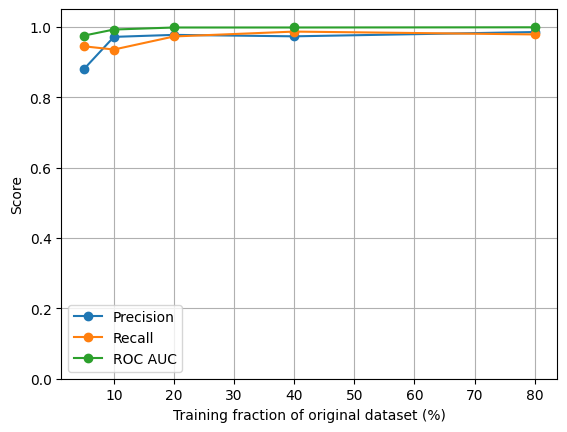

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(results_df['fraction_pct'], results_df['precision'], marker='o', label='Precision')
plt.plot(results_df['fraction_pct'], results_df['recall'], marker='o', label='Recall')
plt.plot(results_df['fraction_pct'], results_df['roc_auc'], marker='o', label='ROC AUC')
plt.xlabel('Training fraction of original dataset (%)')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()
